In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
a = 0.085 * 10**3 # width of slits (um)
d = 0.46 * 10**3 # slit separation (um)
D = 0.494 * 10**6 # Slit distance from detector (um)
wavelength_laser = 0.670 # 670 nm 
center_max = 5010 # detector position of center maxima
background = 0.01005 # Volts
I0 = 2.4015 - background # corrected intensity of center maxima(Volts)

def Fraunhofer(x, a, d, D, wavelength, center_max, I0):
    theta = np.abs(center_max - x)/D
    alpha = (np.pi*a/wavelength) * np.sin(theta)
    beta = (np.pi*d/wavelength) * np.sin(theta)
    return I0 * (np.sin(alpha)/alpha)**2 * (np.cos(beta))**2

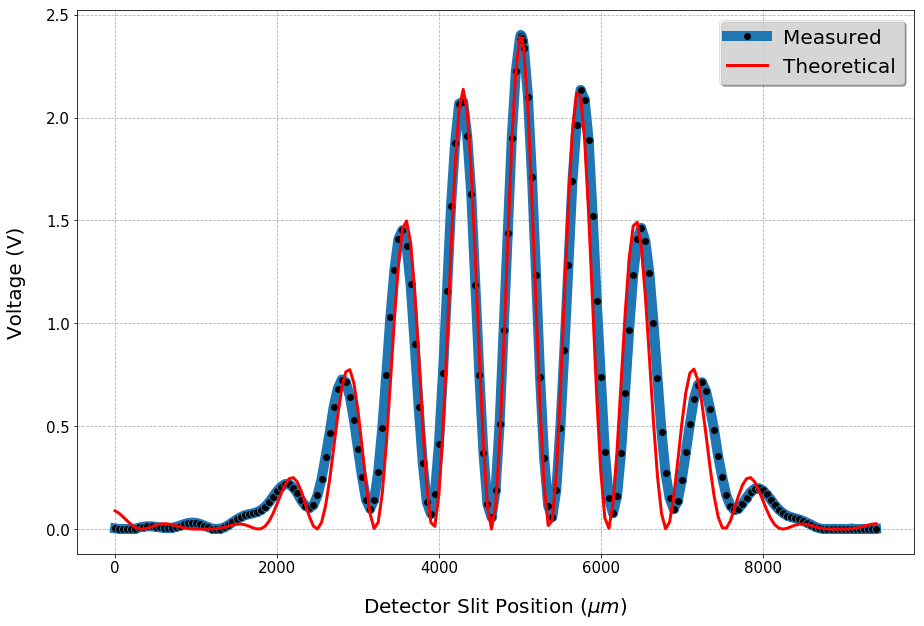

In [3]:
# Laser - Slitblocker P3 position (dual slits)
ds1 = np.genfromtxt('ds1.csv', delimiter=',')

ax = plt.figure(figsize=(15, 10))
#plt.title('Laser Dual Slit Interference', fontsize='30', y=1.03)
plt.xlabel('Detector Slit Position ($\mu m$)', fontsize='20', labelpad=20)
plt.ylabel('Voltage (V)', fontsize='20', labelpad=20)
plt.grid(linestyle='dashed')

plt.plot(ds1[0], ds1[1]-background, lw='10', label='Measured', marker='o',
     markerfacecolor='black', markersize=8)
plt.plot(ds1[0], Fraunhofer(ds1[0], a, d, D, wavelength_laser, center_max, I0),
         linewidth=3, label='Theoretical', color='r')

legend = plt.legend(loc=1, shadow=(True), prop={'size': 20})
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.tick_params(labelsize=15)
#plt.savefig('laser_dual_slit.png');
plt.show()

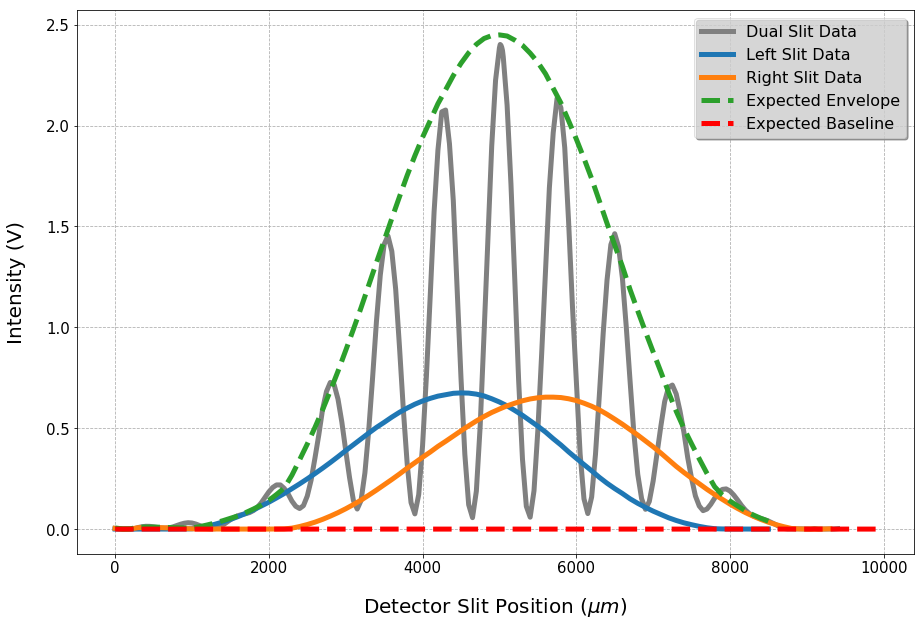

In [4]:
# Laser - Slitblocker P4 position (near slit)
ds2 = np.genfromtxt('ds2.csv', delimiter=',')

# Laser - Slitblocker P2 position (far slit)
ds3 = np.genfromtxt('ds3.csv', delimiter=',')

# Laser - Slitblocker P1 position (both slits blocked)
ds4 = np.genfromtxt('ds4.csv', delimiter=',')

ax = plt.figure(figsize=(15, 10))
plt.xlabel('Detector Slit Position ($\mu m$)', fontsize='20', labelpad=20)
plt.ylabel('Intensity (V)', fontsize='20', labelpad=20)
plt.grid(linestyle='dashed')

plt.plot(ds1[0], ds1[1]-background, linewidth=5, label='Dual Slit Data', color='grey')
plt.plot(ds3[0], ds3[1]-background, lw=5, label='Left Slit Data')
plt.plot(ds2[0], ds2[1]-background, lw=5, label='Right Slit Data')
plt.plot(ds3[0], (np.sqrt(ds2[1][:-8]-background)+np.sqrt(ds3[1]-background))**2,
         lw=5, linestyle='--', label='Expected Envelope')
plt.plot(ds4[0], ds4[1]-background, lw=5, color='red', linestyle='--', label='Expected Baseline')

legend = plt.legend(loc=1, shadow=(True), prop={'size': 16})
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.tick_params(labelsize=15)
#plt.savefig('laser_sum.png')
plt.show()

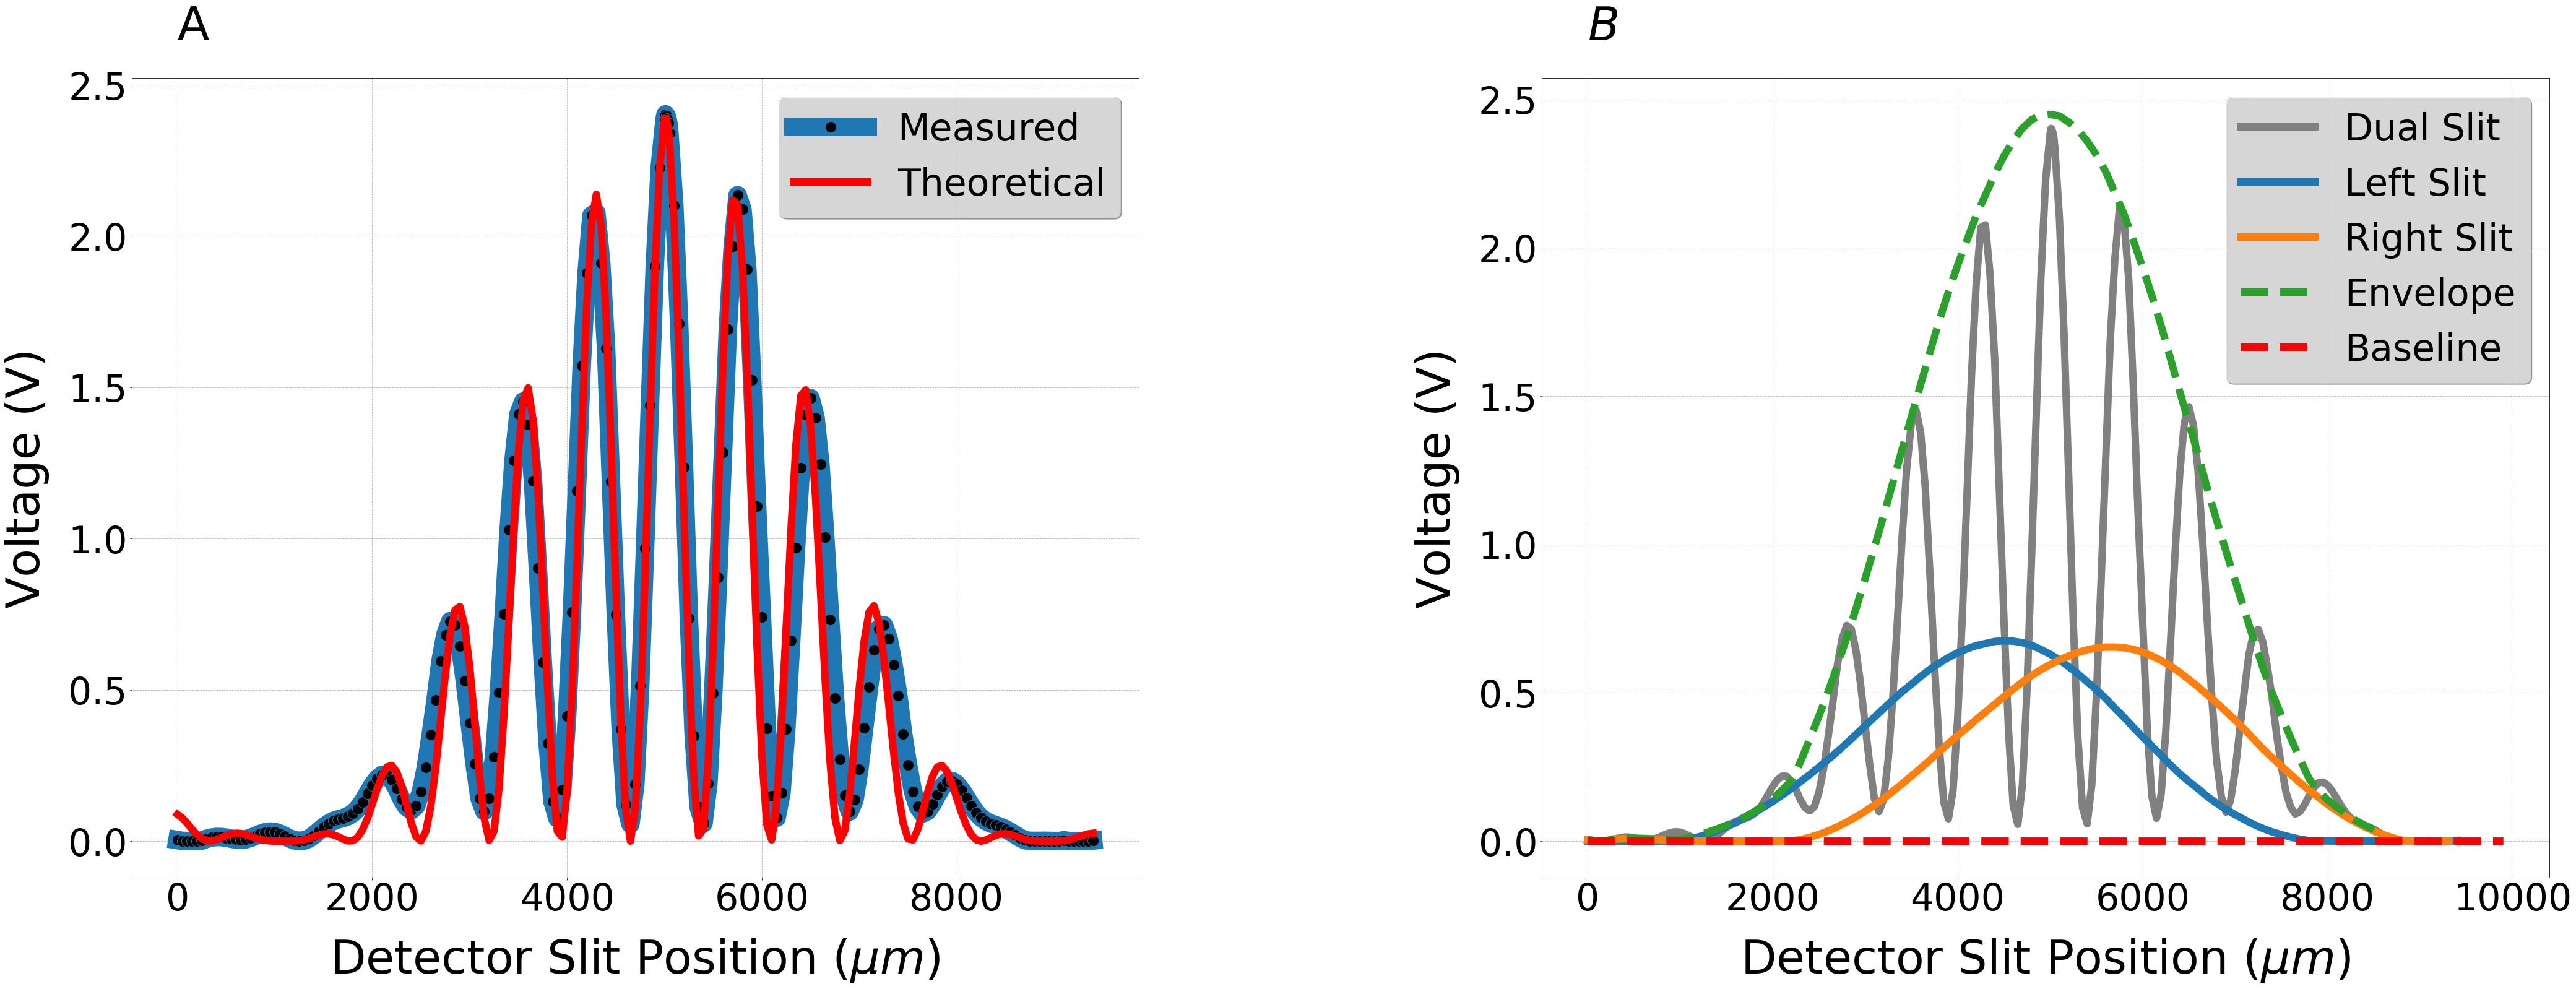

In [5]:
plt.figure(figsize=(70,23))

ax1 = plt.subplot(1,2,1)
ax1.text(0, 2.65, 'A', fontsize=75)
ax1.set_xlabel('Detector Slit Position ($\mu m$)', fontsize='75', labelpad=30)
ax1.set_ylabel('Voltage (V)', fontsize='75', labelpad=30)
ax1.grid(linestyle='dashed')


ax1.plot(ds1[0], ds1[1]-background, lw='30', label='Measured', marker='o',
     markerfacecolor='black', markersize=18)
ax1.plot(ds1[0], Fraunhofer(ds1[0], a, d, D, wavelength_laser, center_max, I0),
         linewidth=12, label='Theoretical', color='r')

legend1 = ax1.legend(loc=1, shadow=(True), prop={'size': 60})
frame1 = legend1.get_frame()
frame1.set_facecolor('#f9f9f9')
frame1.set_alpha(0.6)
ax1.tick_params(labelsize=60)

###################################

ax2 = plt.subplot(1,2,2)
ax2.text(0, 2.7, '$B$', fontsize=75)
ax2.set_xlabel('Detector Slit Position ($\mu m$)', fontsize='75', labelpad=30)
ax2.set_ylabel('Voltage (V)', fontsize='75', labelpad=30)
ax2.grid(linestyle='dashed')

ax2.plot(ds1[0], ds1[1]-background, linewidth=12, label='Dual Slit', color='grey')
ax2.plot(ds3[0], ds3[1]-background, lw=12, label='Left Slit')
ax2.plot(ds2[0], ds2[1]-background, lw=12, label='Right Slit')
ax2.plot(ds3[0], (np.sqrt(ds2[1][:-8]-background)+np.sqrt(ds3[1]-background))**2,
         lw=12, linestyle='--', label='Envelope')
ax2.plot(ds4[0], ds4[1]-background, lw=12, color='red', linestyle='--', label='Baseline')

legend2 = ax2.legend(loc=1, shadow=(True), prop={'size': 60})
frame2 = legend2.get_frame()
frame2.set_facecolor('#f9f9f9')
frame2.set_alpha(0.6)
ax2.tick_params(labelsize=60)

######################

plt.subplots_adjust(wspace=0.4, bottom=0.1)
plt.savefig('laser.png')
plt.show()

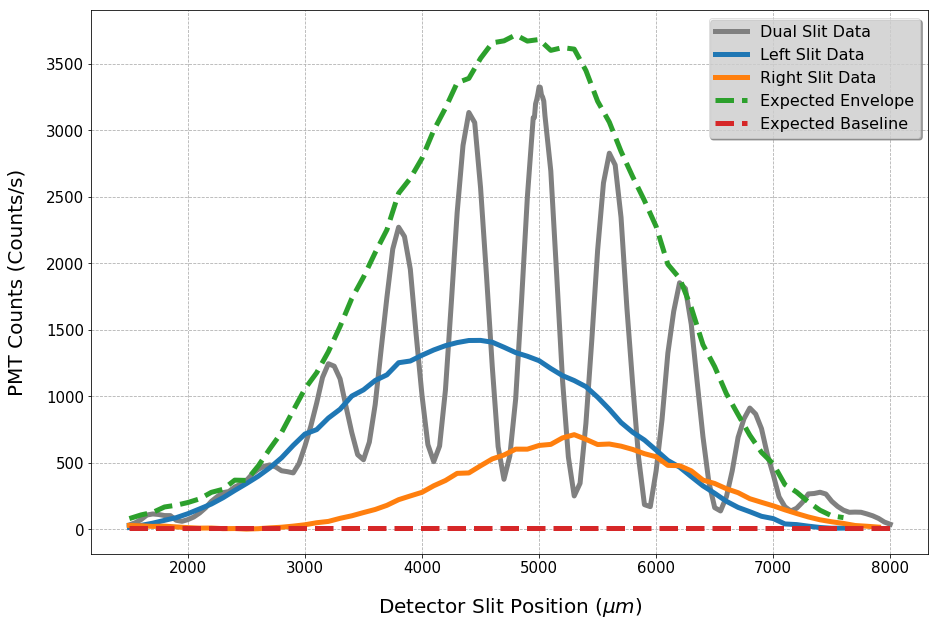

In [6]:
bg2 = 7 # background counts/s

# Laser - Light bulb P3 position (dual slits)
ds5 = np.genfromtxt('ds5.csv', delimiter=',')
ds5_avgs = (ds5[1]+ds5[2]+ds5[3]+ds5[4]+ds5[5]-(5.0*bg2))/5.0

# Laser - Light bulb P2 position (far slit)
ds6 = np.genfromtxt('ds6.csv', delimiter=',')
ds6_avgs = (ds6[1]+ds6[2]+ds6[3]+ds6[4]+ds6[5]-(5.0*bg2))/5.0

# Laser - Light bulb P4 position (near slit)
ds7 = np.genfromtxt('ds7.csv', delimiter=',')
ds7_avgs = (ds7[1]+ds7[2]+ds7[3]+ds7[4]+ds7[5]-(5.0*bg2))/5.0


ax = plt.figure(figsize=(15, 10))
plt.xlabel('Detector Slit Position ($\mu m$)', fontsize='20', labelpad=20)
plt.ylabel('PMT Counts (Counts/s)', fontsize='20', labelpad=20)
plt.grid(linestyle='dashed')

plt.plot(ds5[0], ds5_avgs, label='Dual Slit Data', color='grey', linewidth=5)
plt.plot(ds6[0], ds6_avgs, label='Left Slit Data', linewidth=5)
plt.plot(ds7[0], ds7_avgs, label='Right Slit Data', linewidth=5)
plt.plot(ds6[0], (np.sqrt(ds6_avgs)+np.sqrt(ds7_avgs[:-3]))**2, label='Expected Envelope', linestyle='--', lw=5)
plt.plot([1500,8000], [bg2, bg2], label='Expected Baseline', linestyle='--', lw=5)

legend = plt.legend(loc=1, shadow=(True), prop={'size': 16})
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.tick_params(labelsize=15)
#plt.savefig('bulb_sum.png')
plt.show()

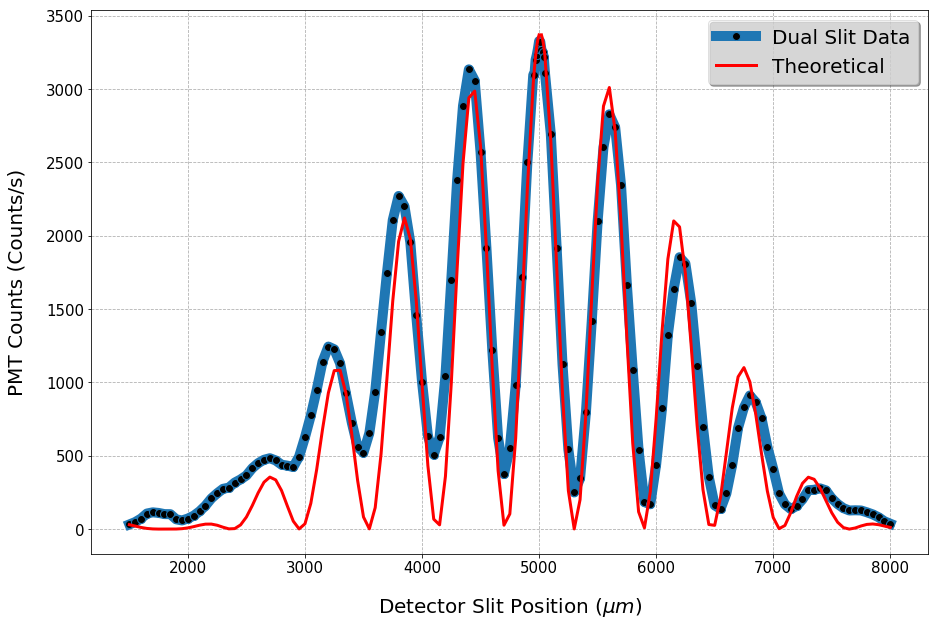

In [7]:
ax = plt.figure(figsize=(15, 10))
plt.xlabel('Detector Slit Position ($\mu m$)', fontsize='20', labelpad=20)
plt.ylabel('PMT Counts (Counts/s)', fontsize='20', labelpad=20)
plt.grid(linestyle='dashed')

plt.plot(ds5[0], ds5_avgs, label='Dual Slit Data', linewidth=10, lw='10', marker='o',
     markerfacecolor='black', markersize=8)
plt.plot(ds5[0], Fraunhofer(ds5[0], a, d, D, 0.546, center_max, 3379),
         linewidth=3, label='Theoretical', color='r')

legend = plt.legend(loc=1, shadow=(True), prop={'size': 20})
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.tick_params(labelsize=15)
#plt.savefig('light_bulb_dual_slit.png')
plt.show()

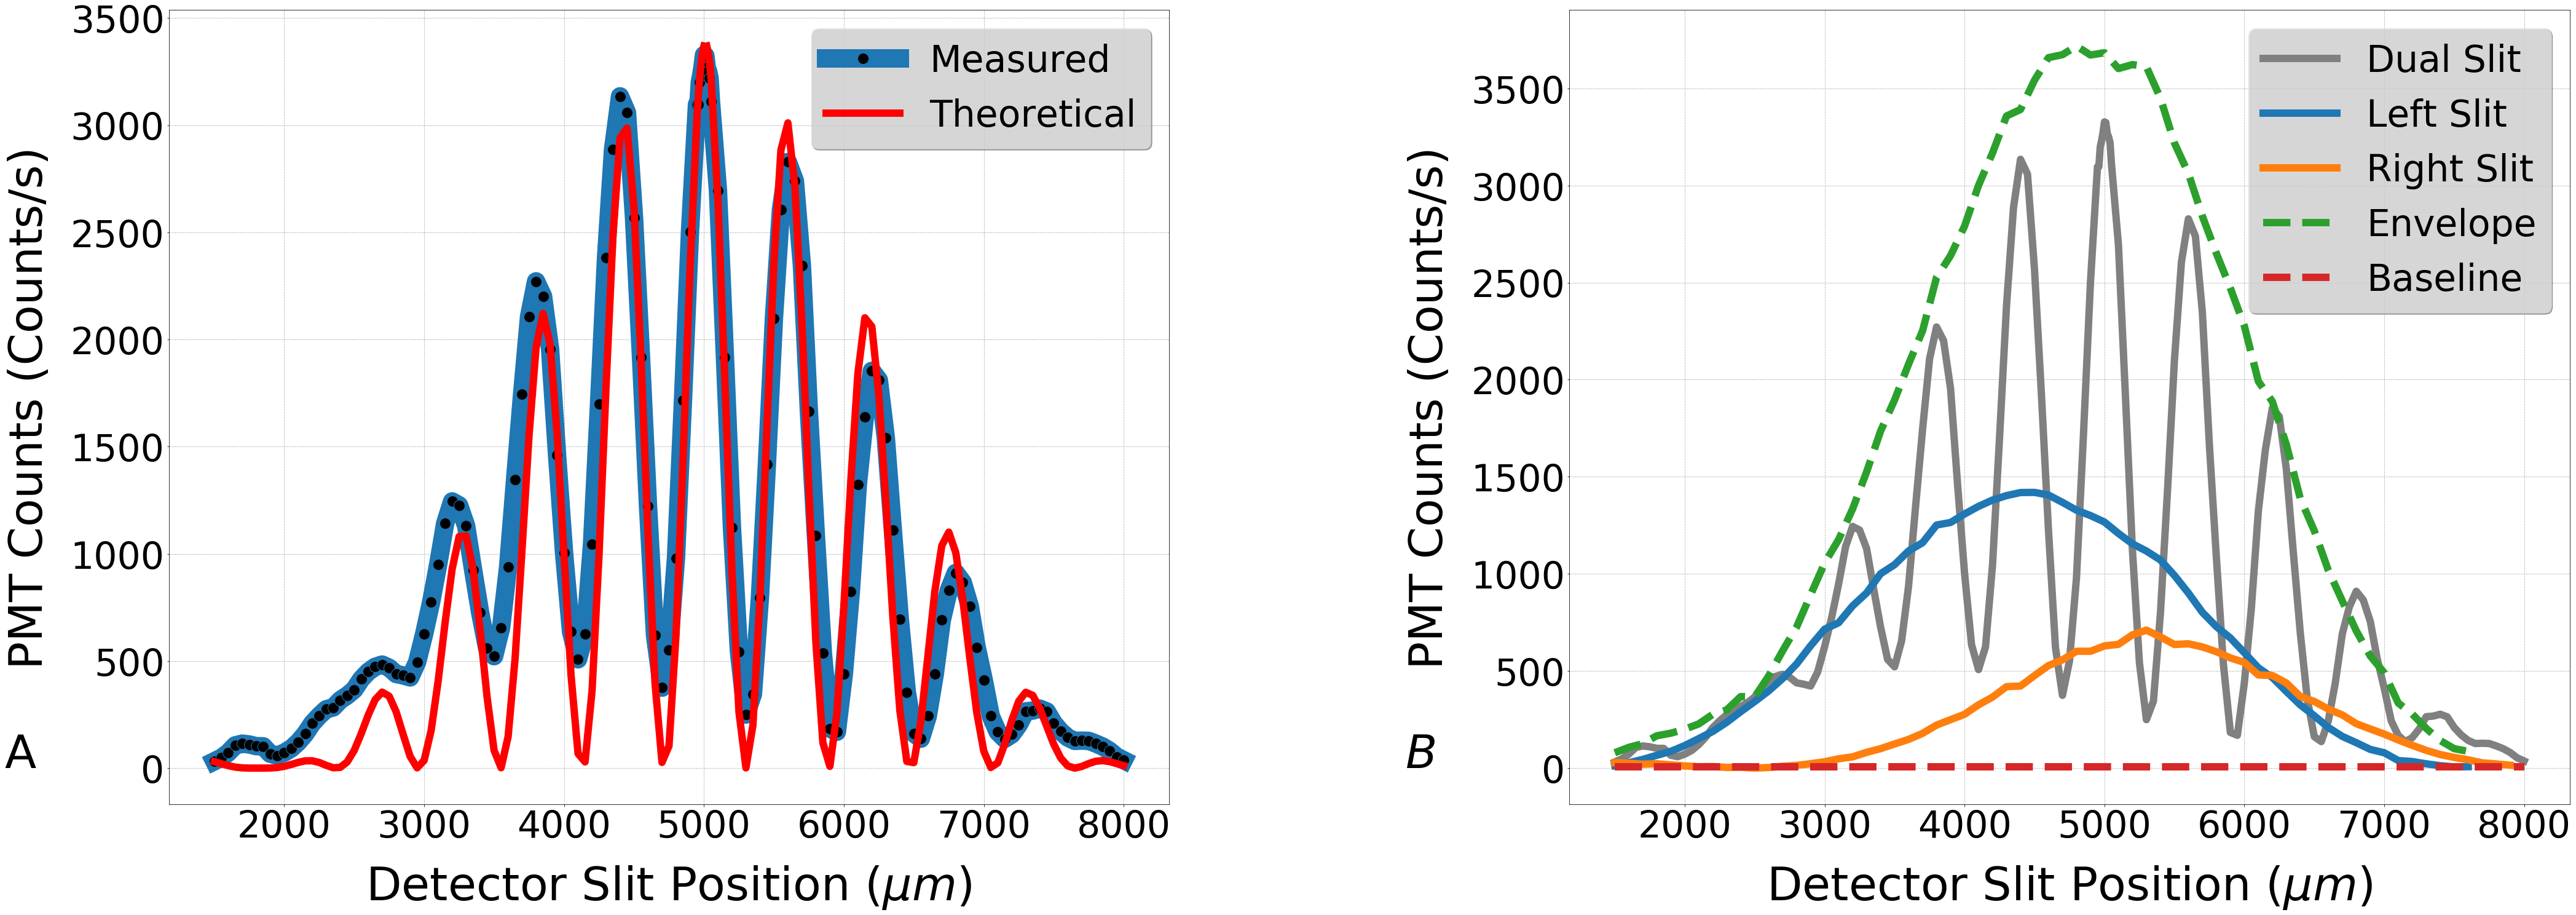

In [8]:
plt.figure(figsize=(70,23))

ax1 = plt.subplot(1,2,1)
ax1.text(0, 2.65, 'A', fontsize=75)
ax1.set_xlabel('Detector Slit Position ($\mu m$)', fontsize='75', labelpad=30)
ax1.set_ylabel('PMT Counts (Counts/s)', fontsize='75', labelpad=30)
ax1.grid(linestyle='dashed')

#plt.plot(ds5[0], ds5_avgs, label='Dual Slit Data', linewidth=10, lw='10', marker='o',
#     markerfacecolor='black', markersize=8)
#plt.plot(ds5[0], Fraunhofer(ds5[0], a, d, D, 0.546, center_max, 3379),
#         linewidth=3, label='Theoretical', color='r')


ax1.plot(ds5[0], ds5_avgs, lw='30', label='Measured', marker='o',
     markerfacecolor='black', markersize=18)
ax1.plot(ds5[0], Fraunhofer(ds5[0], a, d, D, 0.546, center_max, 3379),
         linewidth=12, label='Theoretical', color='r')

legend1 = ax1.legend(loc=1, shadow=(True), prop={'size': 60})
frame1 = legend1.get_frame()
frame1.set_facecolor('#f9f9f9')
frame1.set_alpha(0.6)
ax1.tick_params(labelsize=60)

###################################

ax2 = plt.subplot(1,2,2)
ax2.text(0, 2.7, '$B$', fontsize=75)
ax2.set_xlabel('Detector Slit Position ($\mu m$)', fontsize='75', labelpad=30)
ax2.set_ylabel('PMT Counts (Counts/s)', fontsize='75', labelpad=30)
ax2.grid(linestyle='dashed')

ax2.plot(ds5[0], ds5_avgs, label='Dual Slit', color='grey', linewidth=12)
ax2.plot(ds6[0], ds6_avgs, label='Left Slit', linewidth=12)
ax2.plot(ds7[0], ds7_avgs, label='Right Slit', linewidth=12)
ax2.plot(ds6[0], (np.sqrt(ds6_avgs)+np.sqrt(ds7_avgs[:-3]))**2, label='Envelope', linestyle='--', lw=12)
ax2.plot([1500,8000], [bg2, bg2], label='Baseline', linestyle='--', lw=12)

#ax2.plot(ds1[0], ds1[1]-background, linewidth=12, label='Dual Slit', color='grey')
#ax2.plot(ds3[0], ds3[1]-background, lw=12, label='Left Slit')
#ax2.plot(ds2[0], ds2[1]-background, lw=12, label='Right Slit')
#ax2.plot(ds3[0], (np.sqrt(ds2[1][:-8]-background)+np.sqrt(ds3[1]-background))**2,
#         lw=12, linestyle='--', label='Envelope')
#ax2.plot(ds4[0], ds4[1]-background, lw=12, color='red', linestyle='--', label='Baseline')

legend2 = ax2.legend(loc=1, shadow=(True), prop={'size': 60})
frame2 = legend2.get_frame()
frame2.set_facecolor('#f9f9f9')
frame2.set_alpha(0.6)
ax2.tick_params(labelsize=60)

######################

plt.subplots_adjust(wspace=0.4, bottom=0.1)
plt.savefig('bulb.png')
plt.show()

In [9]:
# Laser - Light bulb P3 position (dual slits)
ds8 = np.genfromtxt('ds8.csv', delimiter=',')

log_mean, log_std = [], []

for i in range(9):
    print('\nIntensity = ' + str(i+1))
    print('\tMean =', np.round(np.mean(ds8[i]), 0))
    print('\tstd =', np.round(stats.tstd(ds8[i]), 0))
    print(np.round((stats.tstd(ds8[i])/np.sqrt(2*95-2)), 0))
    #print('\tstd =', np.std(ds8[i])) # think this is computing the popoulation, not sample, std
    
    log_mean.append(np.log10(np.mean(ds8[i])))
    log_std.append(np.log10(stats.tstd(ds8[i])))


Intensity = 1
	Mean = 8.0
	std = 4.0
0.0

Intensity = 2
	Mean = 45.0
	std = 8.0
1.0

Intensity = 3
	Mean = 137.0
	std = 12.0
1.0

Intensity = 4
	Mean = 342.0
	std = 20.0
1.0

Intensity = 5
	Mean = 702.0
	std = 26.0
2.0

Intensity = 6
	Mean = 1225.0
	std = 35.0
3.0

Intensity = 7
	Mean = 1982.0
	std = 42.0
3.0

Intensity = 8
	Mean = 3262.0
	std = 56.0
4.0

Intensity = 9
	Mean = 4634.0
	std = 66.0
5.0


In [11]:
# overwrite
log_mean = [2.847137367, 3.088464368, 3.297216655, 3.513587651, 3.666024094]
log_std = [1.42294384, 1.540720548, 1.626529382, 1.749395947, 1.822132785]

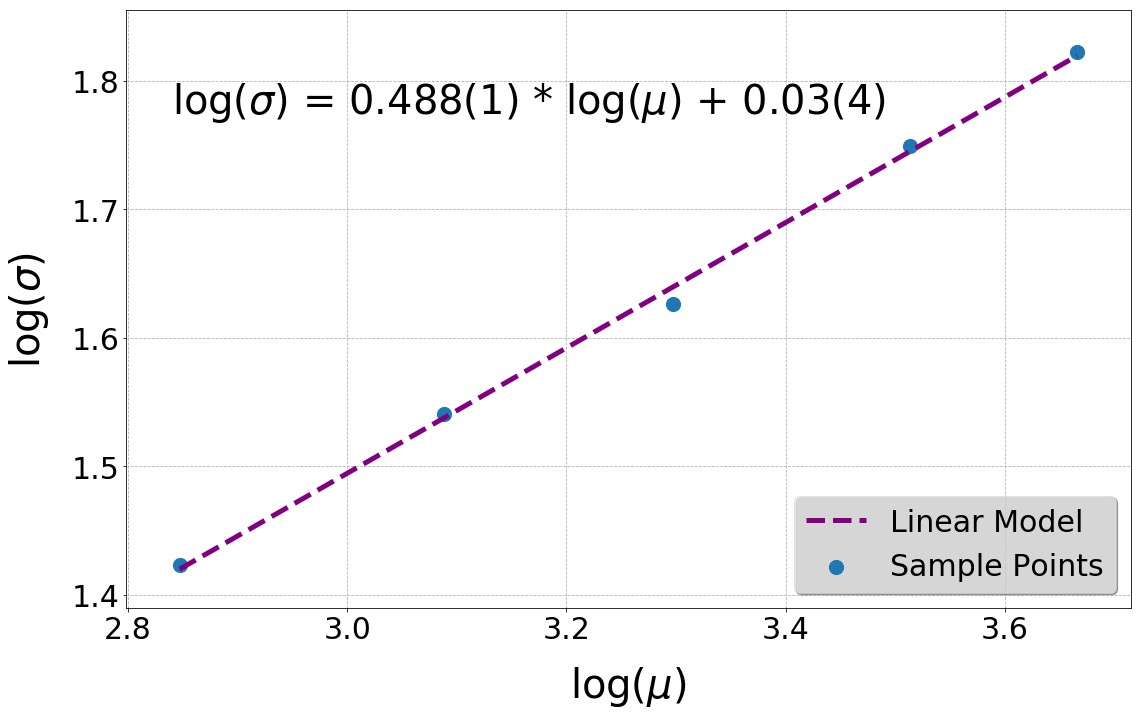

In [19]:
ax = plt.figure(figsize=(18, 11))




plt.xlabel('$\log{(\mu)}$', fontsize='40', labelpad=20)
plt.ylabel('$\log{(\sigma)}$', fontsize='40', labelpad=20)
plt.grid(linestyle='dashed')

slope = np.poly1d(np.polyfit(log_mean, log_std, 1))[1]
intercept = np.poly1d(np.polyfit(log_mean, log_std, 1))[0]

line = '$\log{(\sigma)}$ = ' + str(np.round(slope, 3)) + '(1) * $\log{(\mu)}$ + ' + str(np.round(intercept, 2)) + '(4)'

ax.text(0.16, 0.75, line, fontsize=40)
plt.scatter(log_mean, log_std, s=200, label='Sample Points')

plt.plot(np.unique(log_mean), np.poly1d(np.polyfit(log_mean, log_std, 1))(np.unique(log_mean)),
         color='purple', label='Linear Model', lw=5, ls='--')
#plt.xlim(0, 3.8)
#plt.ylim(0,2)
legend = plt.legend(loc=4, shadow=(True), prop={'size': 30})
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.tick_params(labelsize=30)
plt.savefig('stats.png'); plt.show()

# Note that background counts were not subtracted, as log(-) is not defined. This manefests itself in the intercept

In [ ]:
def rejectOrAccept(alpha, z):
    print('\t|z| =', np.abs(z))
    print('\tp-val', stats.norm.ppf(1-alpha/2.0))
    #print('Z_alpha/2 =', stats.norm.ppf(1-alpha/2.0))
    if np.abs(z) > stats.norm.ppf(1-alpha/2.0):
        return 'Reject H0'
    else:
        return 'Accept H0'

In [ ]:
alpha = 0.05

for i in range(10):
    
    print('Data Set 1')
    
    data_set1 = ds8[i][:48]
    data_set2 = ds8[i][48:]
    
    n1 = len(data_set1)
    y1 = np.mean(data_set1)
    s1_sqr = np.var(data_set1)
    s1 = np.std(data_set1)
    
    n2 = len(data_set2)
    y2 = np.mean(data_set2)
    s2_sqr = np.var(data_set2)
    s2 = np.std(data_set2)
    
    z = (y1 - y2) / np.sqrt( (s1/np.sqrt(n1))**2 + (s2/np.sqrt(n2))**2 )
    
    print('***', rejectOrAccept(alpha, z), '***')
    print('\n')
    

In [ ]:
# Laser

D = 0.494
wl = 670*10**(-9)
d = 0.00046

uD = 0.005
uwl = 5*10**(-9)
ud = 0.05*10**(-3)

y = D * np.tan( np.arcsin(wl/d) )
uy = y * np.sqrt( (uD/D)**2 + (uwl/wl)**2 + (ud/d)**2 )

print('y:', y)
print('Rel. uncertainty:', uy)
print('Propagated uncert.', np.sqrt( (wl*D*ud/d**2)**2 + (D*wl*uwl/d)**2 + (wl*uD/d)**2 ))

In [ ]:
# Light bulb
D = 0.494
wl = 546*10**(-9)
d = 0.00046

uD = 0.005
uwl = 5*10**(-9)
ud = 0.05*10**(-3)
y = D * np.tan( np.arcsin(wl/d) )
uy = y * np.sqrt( (uD/D)**2 + (uwl/wl)**2 + (ud/d)**2 )

print('y', y)
print('Rel. Uncert.', uy)
print('Prop. Uncert.', np.sqrt( (wl*D*ud/d**2)**2 + (D*wl*uwl/d)**2 + (wl*uD/d)**2 ))

In [ ]:
cD = 0.75
c = 2.998 * 10**8
R = 3334

print((cD/c)*R)

In [ ]:
cD = 0.75 # chamber length
c = 2.998 * 10**8

time_in = cD/c
print('Time that photon spends in the chamber:', time_in, 's')